In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')

df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df = df.dropna(axis=1)

### Analysis 1: Most Produced Content Type on Netflix
Netflix provides two types of content: Movies and TV Shows. Based on the data:
- **Movies** are more frequently produced than TV Shows.
- Visualization shows the exact counts for each type.

The bar graph below illustrates the number of Movies and TV Shows available on Netflix:


Most produced content type on Netflix:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64


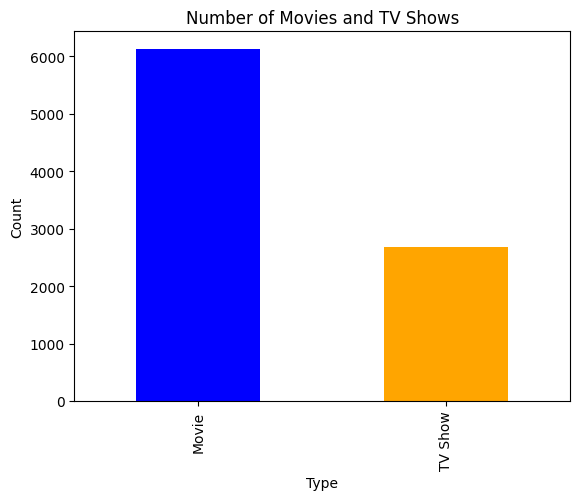

In [10]:
print("Most produced content type on Netflix:\n", df['type'].value_counts())
df['type'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### Analysis 2: Number of Contents by Country (Top 10)
The dataset reveals that Netflix titles are predominantly produced in certain countries:
- The **United States** has the highest number of titles, followed by India and the United Kingdom.
- The bar graph below shows the top 10 countries producing Netflix titles.

Number of contents by country:
 country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


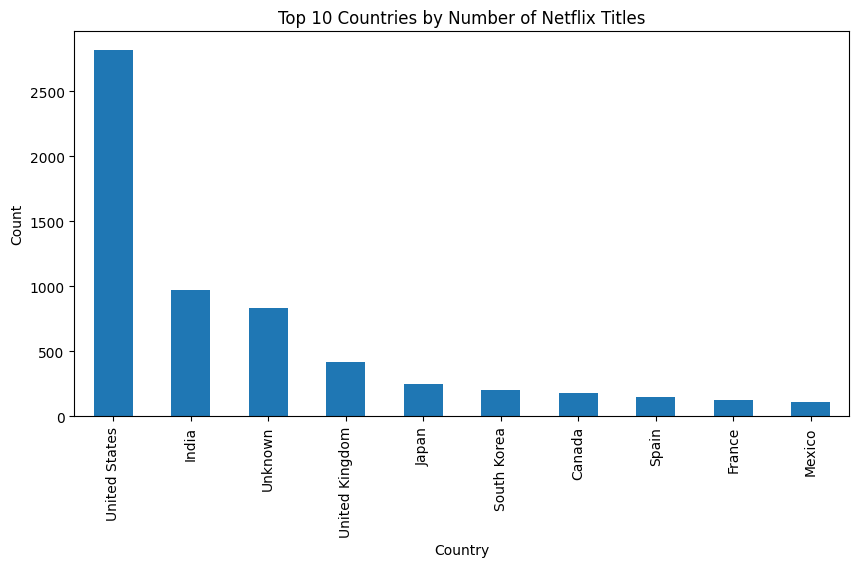

In [11]:
print("Number of contents by country:\n", df['country'].value_counts().head(10))
df['country'].value_counts().head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

### Analysis 3: Top 10 Directors with the Most Contributions
Netflix features contributions from various directors:
- The most prolific director is listed as `Unknown` due to missing data, followed by other directors.
- The horizontal bar graph below highlights the top 10 directors with the most contributions.


Top 10 directors with the most contributions:
 director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64


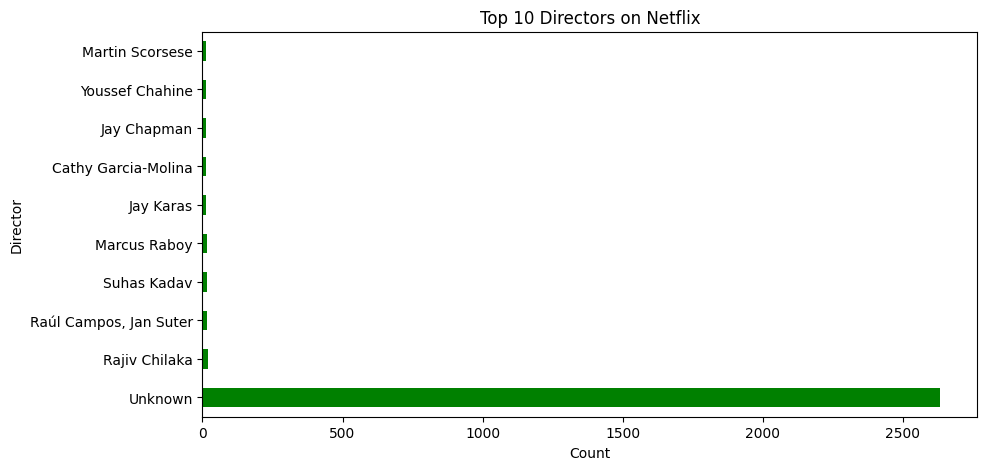

In [12]:
print("Top 10 directors with the most contributions:\n", df['director'].value_counts().head(10))
df['director'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='green')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

### Analysis 4: Most Frequent Genres
The dataset contains a variety of genres. The top 3 genres are:
1. International Movies
2. Dramas
3. Comedies
- The bar graph below shows the 10 most frequent genres available on Netflix.


Most frequent genres:
 listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


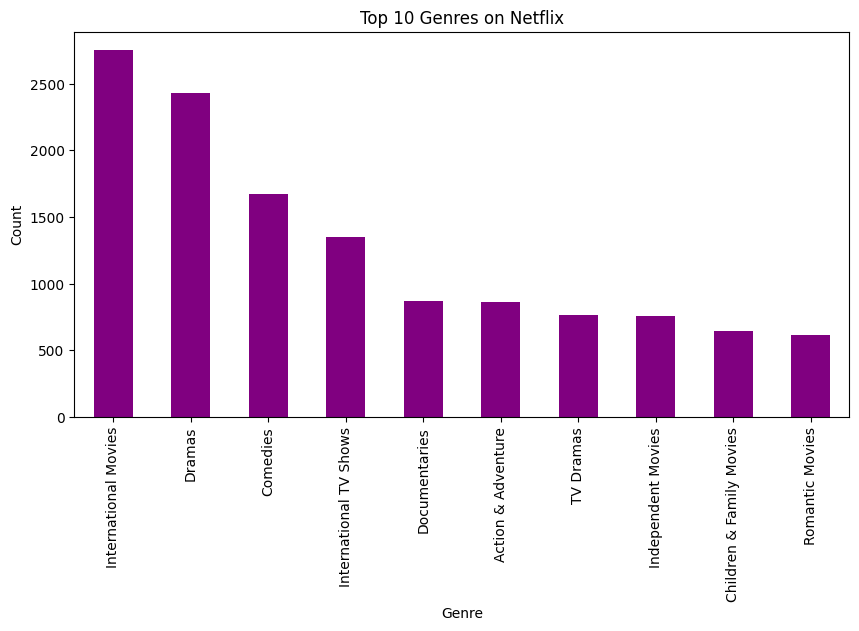

In [13]:
df['listed_in'] = df['listed_in'].fillna('Unknown')
genres = df['listed_in'].str.split(', ').explode()
print("Most frequent genres:\n", genres.value_counts().head(10))
genres.value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

### Analysis 5: Number of Contents per Release Year
The release year analysis shows:
- Netflix titles have been steadily increasing over the years.
- A significant surge in content occurred after 2015, indicating Netflix's global expansion.
- The line graph below illustrates the number of titles released per year.


Number of contents per release year:
 release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


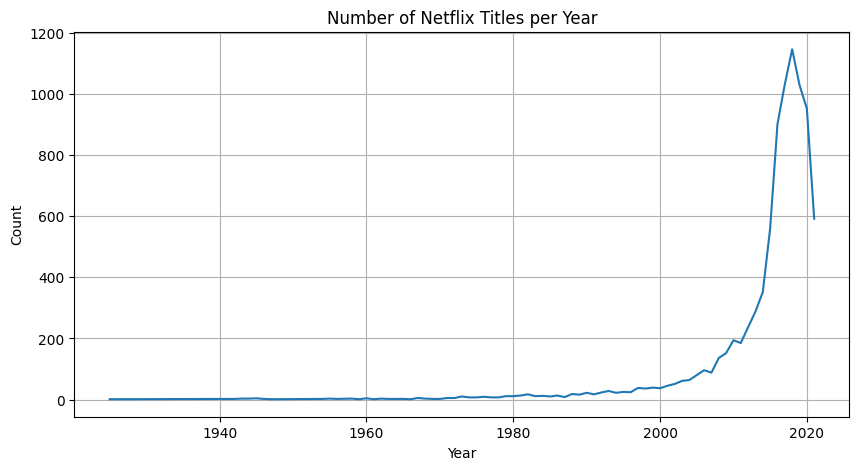

In [14]:
print("Number of contents per release year:\n", df['release_year'].value_counts().sort_index())
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 5))
plt.title('Number of Netflix Titles per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Analysis 6: Average Duration by Content Type
The average duration for Movies and TV Shows is:
- Movies: 90-120 minutes on average.
- TV Shows: Typically one or more seasons with varying episode lengths.
- The bar graph below displays the average duration of Movies and TV Shows.


Content type distribution by release year:
 type          Movie  TV Show
release_year                
2012          173.0     64.0
2013          225.0     63.0
2014          264.0     88.0
2015          398.0    162.0
2016          658.0    244.0
2017          767.0    265.0
2018          767.0    380.0
2019          633.0    397.0
2020          517.0    436.0
2021          277.0    315.0


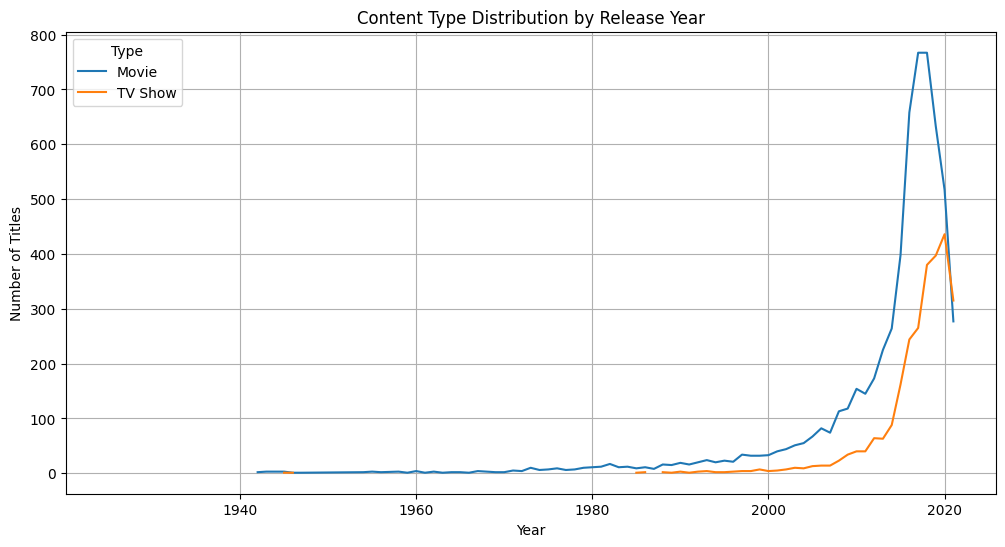

In [22]:
if 'release_year' in df.columns and 'type' in df.columns:
    # Group by release_year and type, then count the number of titles
    year_type_distribution = df.groupby(['release_year', 'type']).size().unstack()
    print("Content type distribution by release year:\n", year_type_distribution.tail(10))  # Last 10 years

    # Plot the data
    year_type_distribution.plot(kind='line', figsize=(12, 6))
    plt.title('Content Type Distribution by Release Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.legend(title='Type')
    plt.grid(True)
    plt.show()
else:
    print("'release_year' or 'type' column not found in the dataset.")
